In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.vision.gan import *

In [3]:
path = untar_data(URLs.LSUN_BEDROOMS)

In [4]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
           .split_none()
           .label_from_func(noop)
           .transform(tfms=[[crop_pad(size=size, row_pct=(0, 1), col_pct=(0,1))], []], size=size, tfm_y=True)
           .databunch(bs=bs)
           .normalize(stats = [torch.tensor([0.5, 0.5, 0.5]), torch.tensor([0.5, 0.5, 0.5])], do_x=False, do_y=True)
           )

In [5]:
data = get_data(128, 64)

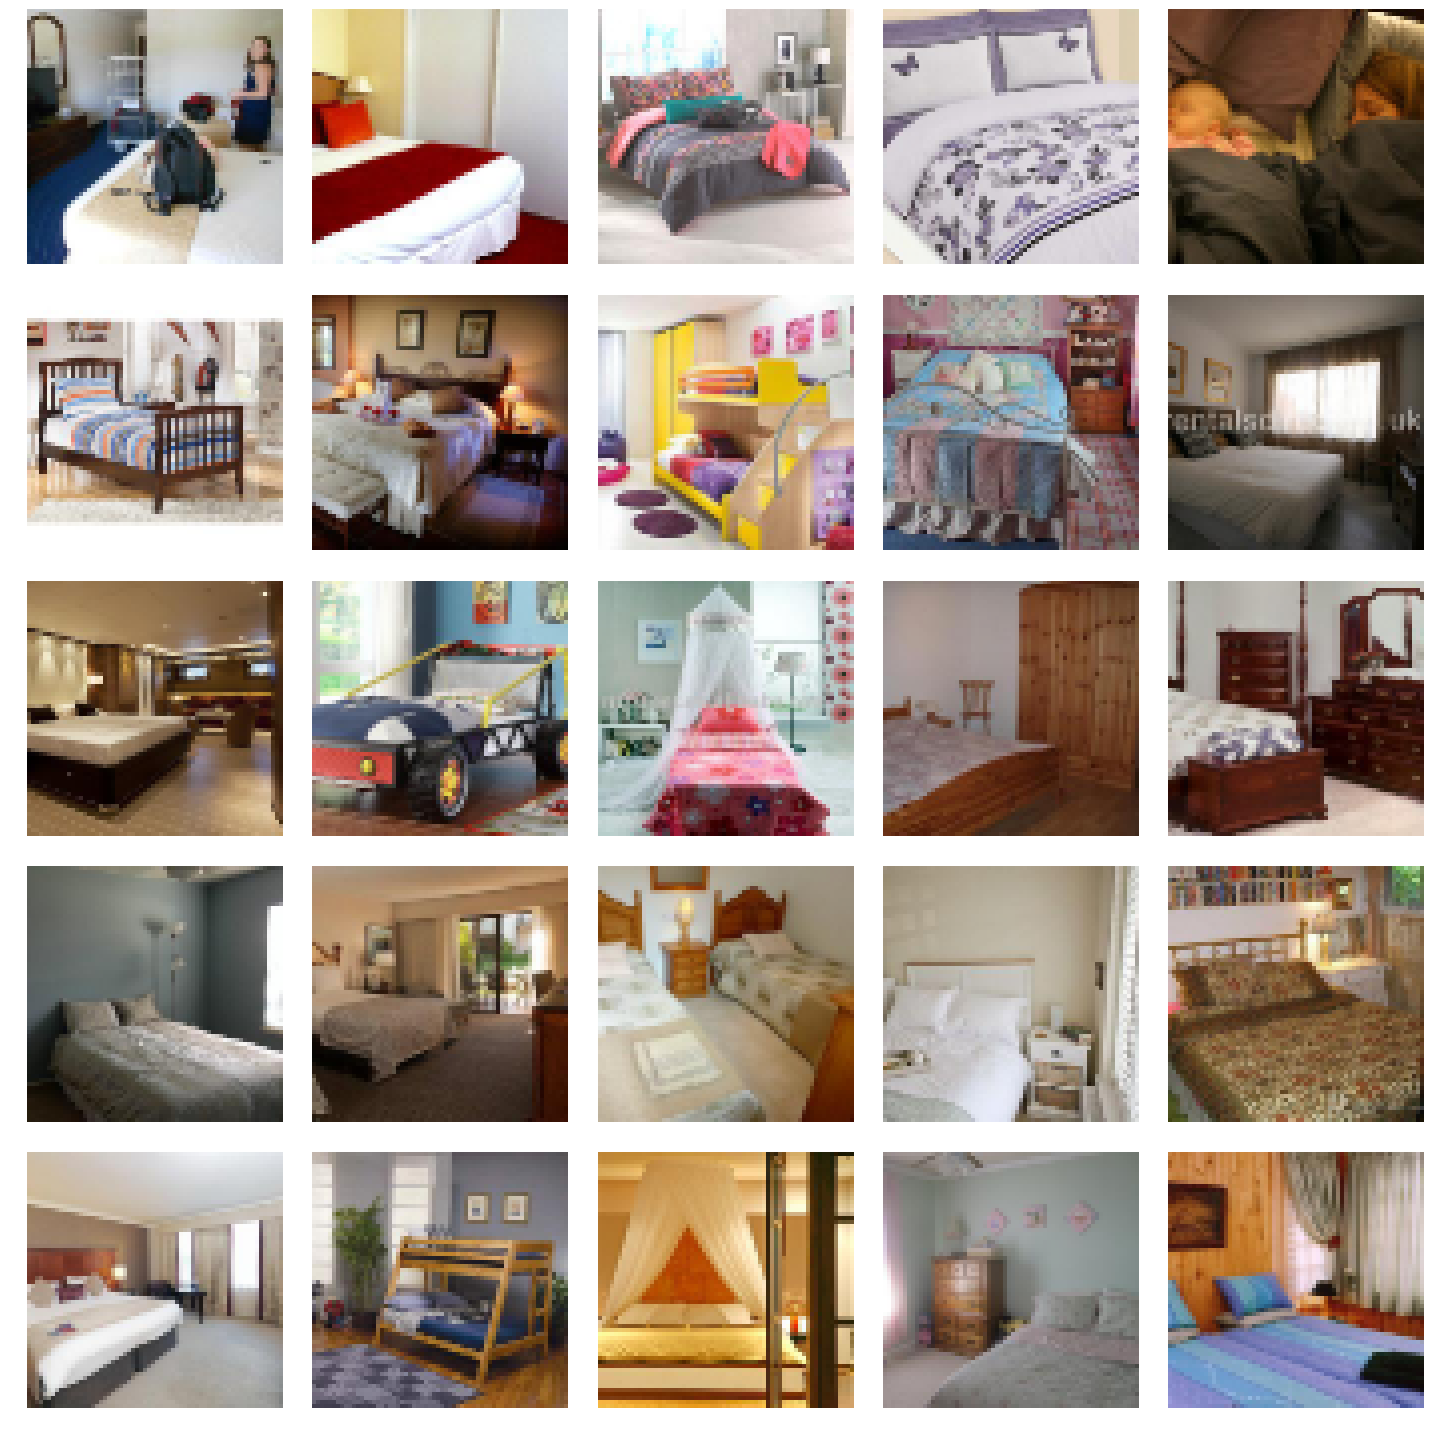

In [6]:
data.show_batch(rows=5)

## Models

In [7]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [8]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False, 
                       opt_func=partial(optim.Adam, betas=(0., 0.99)), wd=0.)

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.786335,#na#,0.599708,-1.055202,05:21
1,-0.710909,#na#,0.529413,-0.969123,04:46
2,-0.743136,#na#,0.501812,-0.993687,04:48
3,-0.595721,#na#,0.455615,-0.792296,04:50
4,-0.586431,#na#,0.411209,-0.780508,04:40
5,-0.532243,#na#,0.408600,-0.735056,04:29
6,-0.518648,#na#,0.377628,-0.691608,04:27
7,-0.479712,#na#,0.334133,-0.641841,04:28
8,-0.437034,#na#,0.330076,-0.603113,04:31
9,-0.424811,#na#,0.307429,-0.569485,04:29


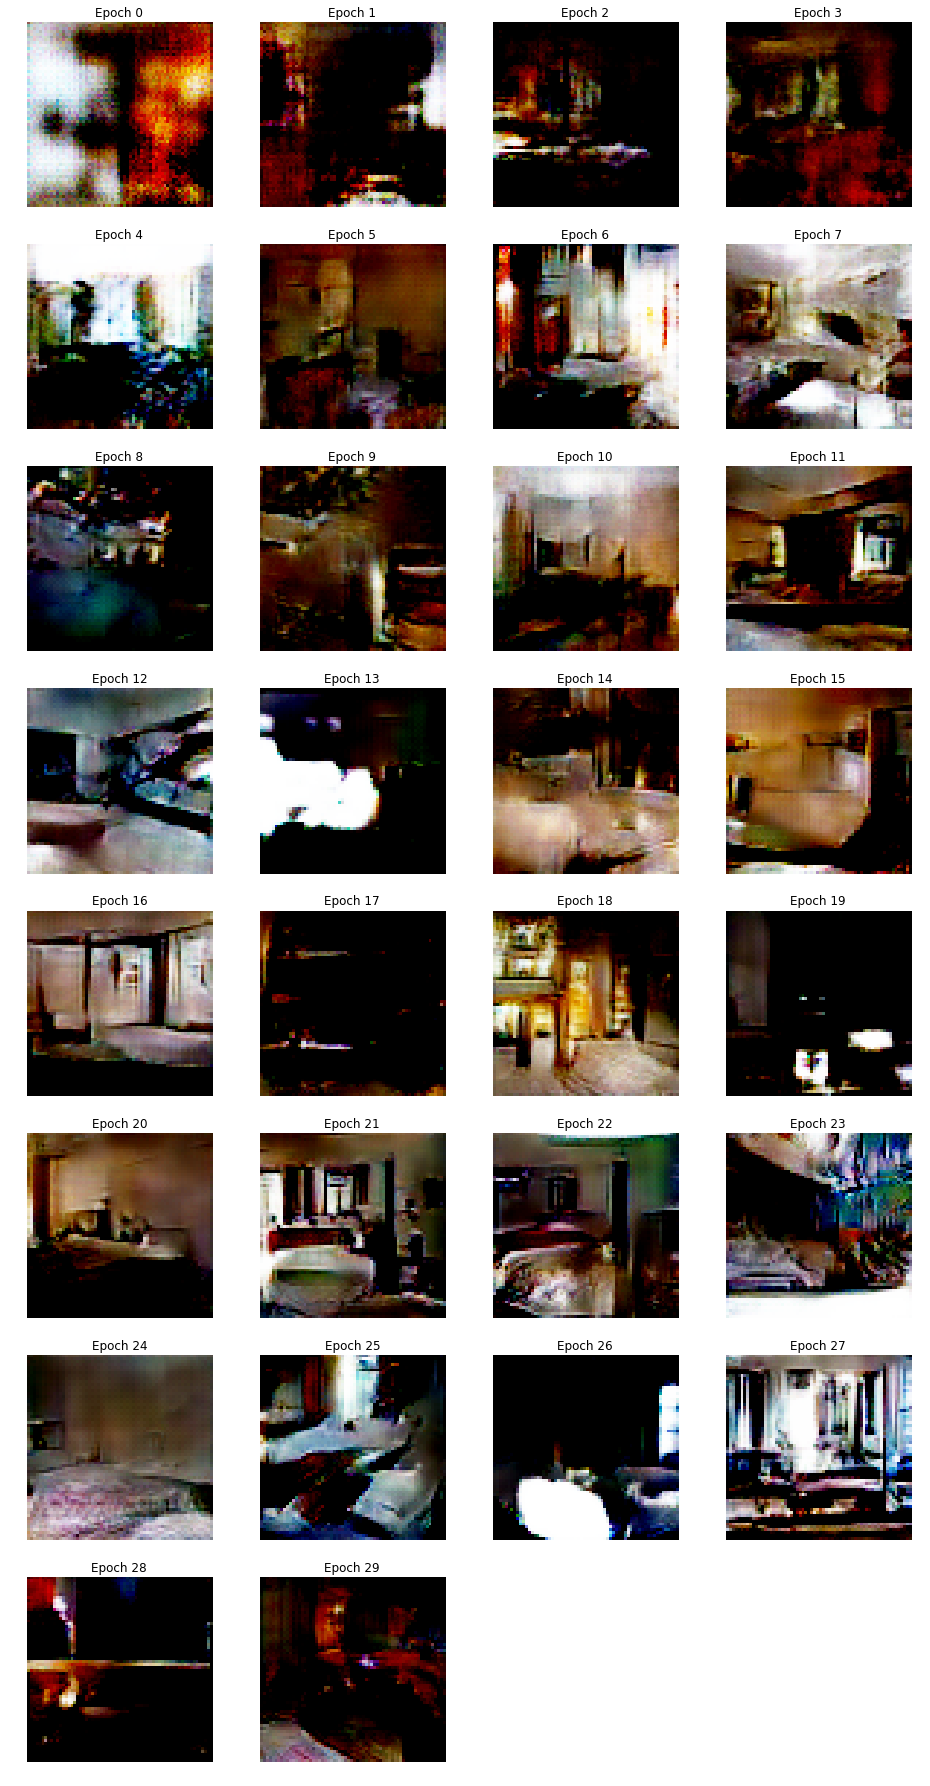

In [9]:
learn.fit(30, 2e-4)

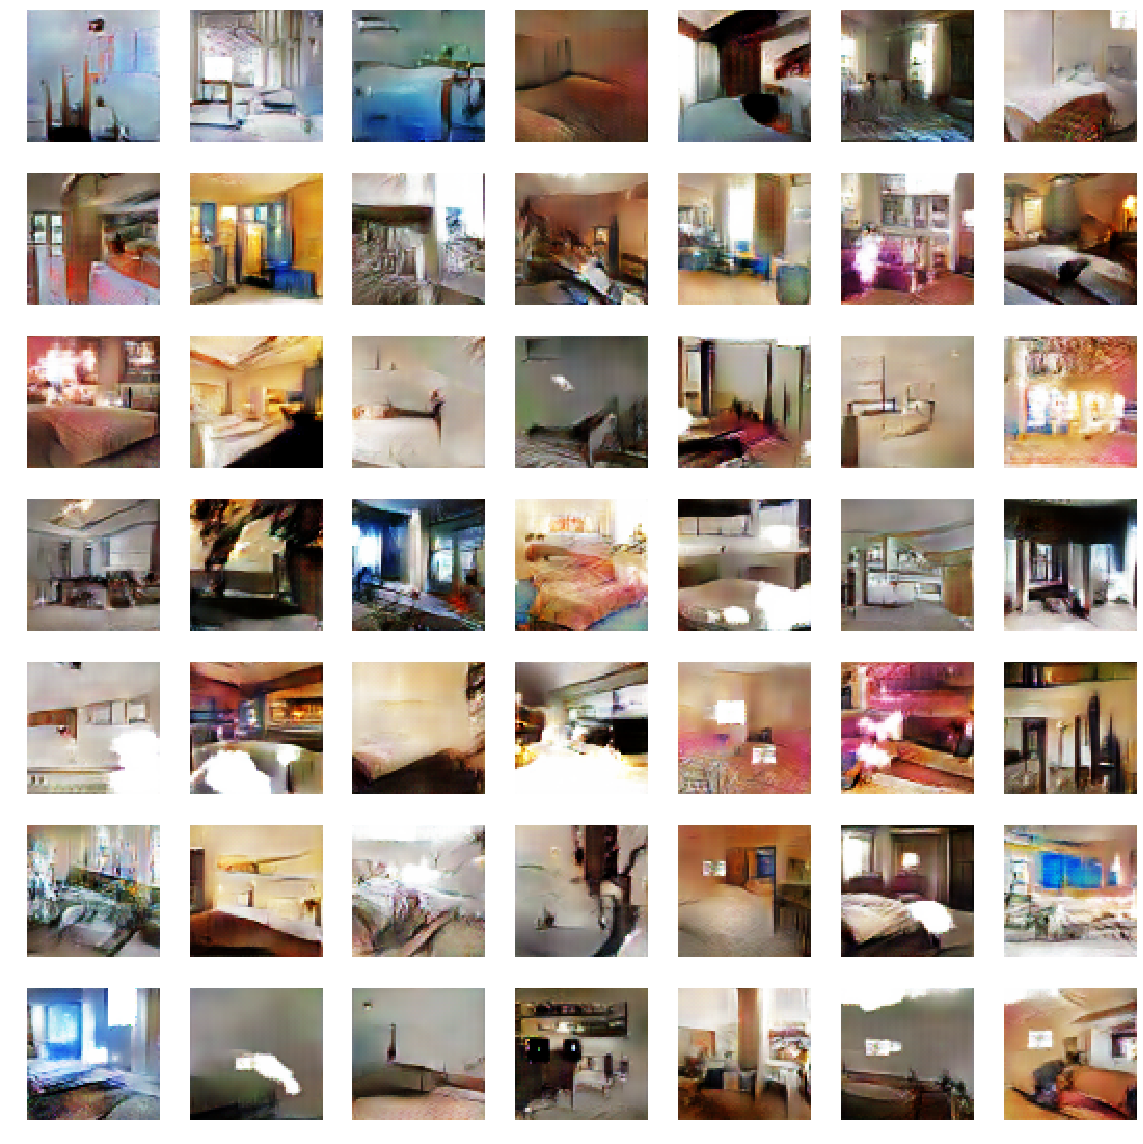

In [18]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=7, figsize=(16, 16))